### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [375]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [376]:
data = pd.read_csv('data/coupons.csv')

In [377]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [378]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [379]:
#Identify columns with NaN values
null_columns = data.columns[data.isna().any()]
null_columns

Index(['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20',
       'Restaurant20To50'],
      dtype='object')

3. Decide what to do about your missing data -- drop, replace, other...

In [380]:
#Drop column "car" as there are only 108 non-null values and not relevant for our analysis
data1 = data.drop(columns="car")

#Fill NaN values with "mode" values in the remaining null_columns
nan_cols = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20','Restaurant20To50']
data1[nan_cols] = data1[nan_cols].apply(lambda x: x.fillna(x.mode()[0]))
data1.info()
data1.columns[data1.isna().any()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

Index([], dtype='object')

4. What proportion of the total observations chose to accept the coupon?



Proportion of the total observations chose to accept the coupon : 0.57


Text(0.5, 1.0, 'Proportion of Coupons Accepted')

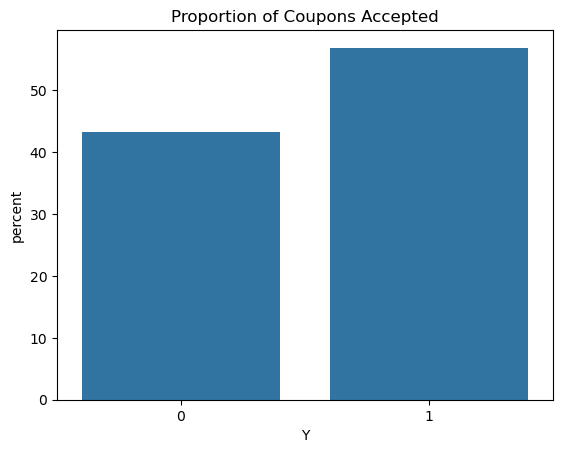

In [381]:
accepted_proportion = data1["Y"].mean()
print(f"Proportion of the total observations chose to accept the coupon : {accepted_proportion:.2f}")
sns.countplot(data = data1, x = "Y", stat = "percent", legend="brief")
plt.title("Proportion of Coupons Accepted")

5. Use a bar plot to visualize the `coupon` column.

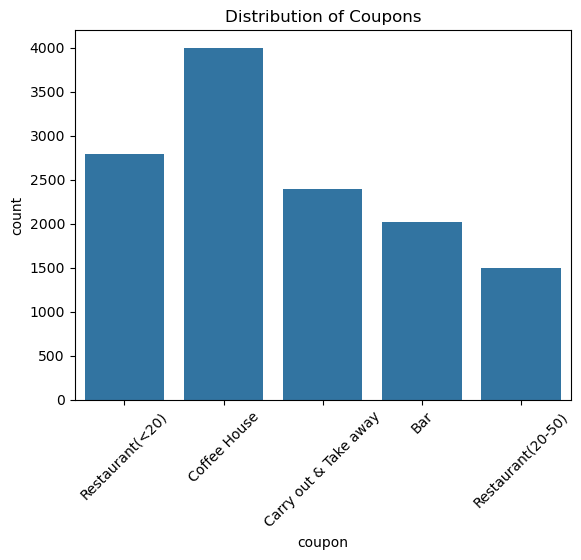

In [382]:
sns.countplot(data = data1, x = "coupon")
plt.title ("Distribution of Coupons")
plt.xticks(rotation=45)
plt.savefig('images/DistributionOfCoupons.png')

6. Use a histogram to visualize the temperature column.

In [383]:
data1.temperature.unique()

array([55, 80, 30])

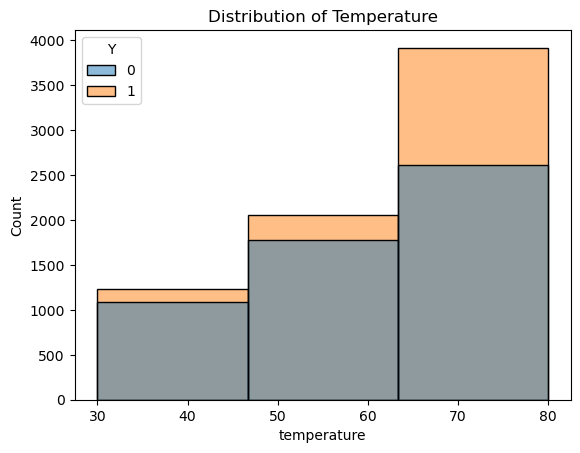

In [384]:
sns.histplot(data=data1, x="temperature", hue="Y", bins=3)
plt.title("Distribution of Temperature")
plt.savefig('images/DistributionOfTemperature.png')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


Text(0.5, 1.0, 'Visualize Bar Values')

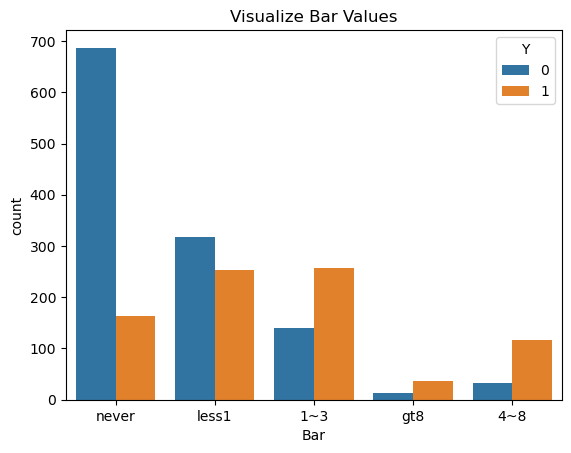

In [385]:
bar_data = data1[data1["coupon"] == "Bar"]

#Dataframe that contains only accepted(Y=1) bar coupons
bar_accepted_data = bar_data[bar_data["Y"] == 1]

# Visualize "Bar values"
sns.countplot(data = bar_data, x="Bar", hue="Y")
plt.title("Visualize Bar Values")

#### Visualizing bar column in the above plot confirms acceptance rate is higher if frequency of bar visits is more than once.


2. What proportion of bar coupons were accepted?


Proportion of bar coupons accepted : 0.41


Text(0.5, 1.0, 'Proportion of Bar Coupons Accepted')

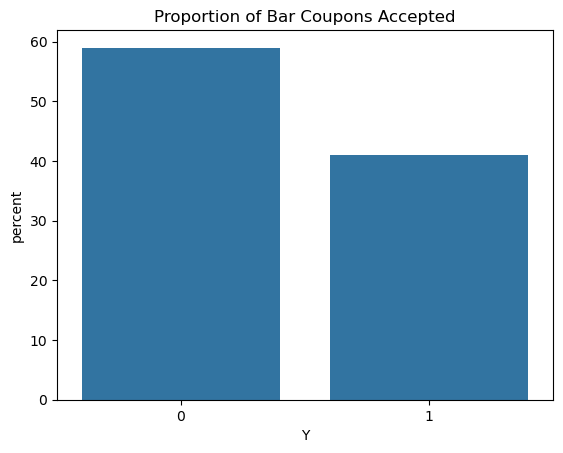

In [386]:
accepted_proportion = bar_data["Y"].mean()
print(f"Proportion of bar coupons accepted : {accepted_proportion:.2f}")
sns.countplot(data = bar_data, x = "Y", stat = "percent", legend="brief")
plt.title("Proportion of Bar Coupons Accepted")

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Acceptance rate for drivers who went to a bar 3 or fewer times a month:  37.07%
Acceptance rate for drivers who went to a bar more than 3 times a month:  76.88%

Higher acceptance rate for drivers who went to a bar more than 3 times a month



Text(0.5, 1.0, 'Distribution of Bar Coupons')

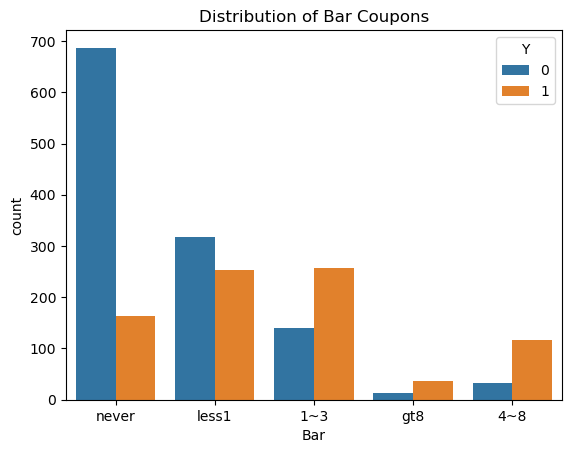

In [387]:
bar_lte_3 = ["never", "less1", "1~3"]
bar_gt_3 = ["4~8", "gt8"]

bar_lte_3_accepted_rate = bar_data[bar_data["Bar"].isin(bar_lte_3)]["Y"].mean()
bar_gt_3_accepted_rate = bar_data[bar_data["Bar"].isin(bar_gt_3)]["Y"].mean()

print (f"Acceptance rate for drivers who went to a bar 3 or fewer times a month: {bar_lte_3_accepted_rate: .2%}")
print (f"Acceptance rate for drivers who went to a bar more than 3 times a month: {bar_gt_3_accepted_rate: .2%}")

if (bar_lte_3_accepted_rate > bar_gt_3_accepted_rate):
    print (f"\nHigher acceptance rate for drivers who went to a bar 3 or fewer times a month\n")
elif (bar_lte_3_accepted_rate < bar_gt_3_accepted_rate):
    print (f"\nHigher acceptance rate for drivers who went to a bar more than 3 times a month\n")
else:
    print (f"\nAcceptance rate is same for both groups\n")

sns.countplot(data = bar_data, x = "Bar", hue="Y", legend="brief")
plt.title("Distribution of Bar Coupons")


#### Visualizing bar column in the above plot confirms acceptance rate is higher if frequency of bar visits is more than three times a month.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25:  69.52%
Acceptance rate for drivers who go to a bar <once per month and age <25:  39.33%

Higher acceptance rate for drivers who go to a bar >once per month and age >25



Text(0.5, 1.0, 'Accepted Coupons by Age and FrequencyOfVisits')

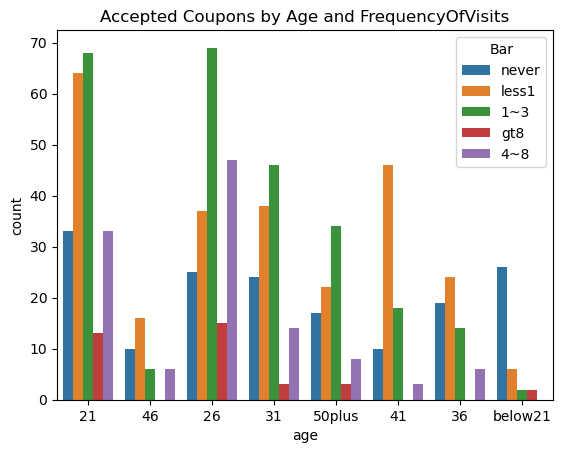

In [388]:
bar_gt_once = ['1~3','4~8','gt8']
age_gt_25 = ['26','31','36','41','46','50plus']

bar_gt_once_df = bar_data.loc[(bar_data['Bar'].isin(bar_gt_once)) & (bar_data['age'].isin(age_gt_25))]
bar_gt_once_accepted_rate = bar_gt_once_df["Y"].mean()

bar_others_df = bar_data.loc[(~bar_data['Bar'].isin(bar_gt_once)) & (~bar_data['age'].isin(age_gt_25))]
bar_others_accepted_rate = bar_others_df["Y"].mean()

print (f"Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: {bar_gt_once_accepted_rate: .2%}")
print (f"Acceptance rate for drivers who go to a bar <once per month and age <25: {bar_others_accepted_rate: .2%}")

if (bar_gt_once_accepted_rate > bar_others_accepted_rate):
    print (f"\nHigher acceptance rate for drivers who go to a bar >once per month and age >25\n")
elif (bar_gt_once_accepted_rate < bar_others_accepted_rate):
    print (f"\nHigher acceptance rate for drivers who go to a bar <once per month and age <25\n")
else:
    print (f"\nAcceptance rate is same for both groups\n")

sns.countplot(data = bar_accepted_data, x="age", hue="Bar",legend="brief")
plt.title("Accepted Coupons by Age and FrequencyOfVisits")




#### Above plot is based on accepted bar coupons data. The plot confirms coupons should be targeted to drivers in the age group 20-30 who go to bar 1~3 times a month.  

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [389]:
bar_gt_once = ["1~3", "4~8", "gt8"]

#Dataframe for drivers who go to bar more than once and accepted bar coupons
bar_accepted_gt_once_data = bar_accepted_data[bar_accepted_data["Bar"].isin(bar_gt_once)]

bar_GT_once_NoKids_NotFarm_df = bar_data.loc[(bar_data['Bar'].isin(bar_gt_once)) & (~bar_data['passanger'].isin(["Kid(s)"])) & (~bar_data['occupation'].isin(["Farming Fishing & Forestry"])) ]
bar_GT_once_NoKids_NotFarm_accepted_rate = bar_GT_once_NoKids_NotFarm_df["Y"].mean()

bar_others_df = bar_data.loc[(~bar_data['Bar'].isin(bar_gt_once)) & (bar_data['passanger'].isin(["Kid(s)"])) & (bar_data['occupation'].isin(["Farming Fishing & Forestry"])) ]
bar_others_accepted_rate = bar_others_df["Y"].mean()

print(f"Acceptance rate for drivers who go to bars more than once a month and no kids as passengers and not in farming,fishing, or forestry: {bar_GT_once_NoKids_NotFarm_accepted_rate: .0%}")
print(f"Acceptance rate for drivers who are in the other group: {bar_others_accepted_rate: .0%}")

if (bar_GT_once_NoKids_NotFarm_accepted_rate > bar_others_accepted_rate):
    print (f"\nHigher acceptance rate for drivers who go to a bar >once per month and and no kids as passengers and not in farming,fishing, or forestry\n")
elif (bar_GT_once_NoKids_NotFarm_accepted_rate < bar_others_accepted_rate):
    print (f"\nHigher acceptance rate for drivers in the others group\n")
else:
    print (f"\nAcceptance rate is same for both groups\n")

Acceptance rate for drivers who go to bars more than once a month and no kids as passengers and not in farming,fishing, or forestry:  71%
Acceptance rate for drivers who are in the other group:  33%

Higher acceptance rate for drivers who go to a bar >once per month and and no kids as passengers and not in farming,fishing, or forestry



Text(0.5, 1.0, 'Accepted Coupons when FrequencyOfVisits > 1\nPassenger not a kid\nOccupation not in Farming Fishing & Forestry\nOccupation & Passenger ')

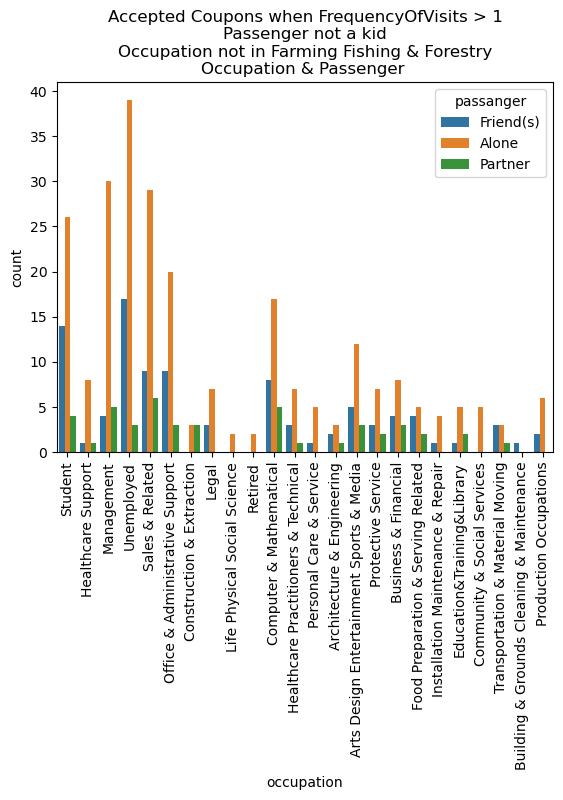

In [390]:
# Dataframe of drivers who go to bar more than once a month ride without a kid, not in Farm occupation and accepted the bar coupon 
bar_accepted_GT_once_NoKids_NotFarm_df = bar_accepted_data.loc[(bar_accepted_data['Bar'].isin(bar_gt_once)) & (~bar_accepted_data['passanger'].isin(["Kid(s)"])) & (~bar_accepted_data['occupation'].isin(["Farming Fishing & Forestry"]))]

sns.countplot(data = bar_accepted_GT_once_NoKids_NotFarm_df , x= "occupation", hue = "passanger", legend="brief")
plt.xticks(rotation = 90)
plt.title("Accepted Coupons when FrequencyOfVisits > 1\nPassenger not a kid\nOccupation not in Farming Fishing & Forestry\nOccupation & Passenger ")

#### Above plot is based on data from drivers who accepted coupons and meet the following conditons -who go to bar more than once a month, passenger is not a kid and not employed in Farming Fishing & Forestry. The occupation vs passenger data from this data confirms coupons should be targeted to drivers who are unemployed and travel alone.  

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Architecture & Engineering'),
  Text(2, 0, 'Education&Training&Library'),
  Text(3, 0, 'Student'),
  Text(4, 0, 'Healthcare Support'),
  Text(5, 0, 'Healthcare Practitioners & Technical'),
  Text(6, 0, 'Sales & Related'),
  Text(7, 0, 'Management'),
  Text(8, 0, 'Computer & Mathematical'),
  Text(9, 0, 'Personal Care & Service'),
  Text(10, 0, 'Office & Administrative Support'),
  Text(11, 0, 'Construction & Extraction'),
  Text(12, 0, 'Legal'),
  Text(13, 0, 'Retired'),
  Text(14, 0, 'Community & Social Services'),
  Text(15, 0, 'Life Physical Social Science'),
  Text(16, 0, 'Arts Design Entertainment Sports & Media'),
  Text(17, 0, 'Installation Maintenance & Repair'),
  Text(18, 0, 'Business & Financial'),
  Text(19, 0, 'Protective Service'),
  Text(20, 0, 'Food Preparation & Serving Related'),
  Text(2

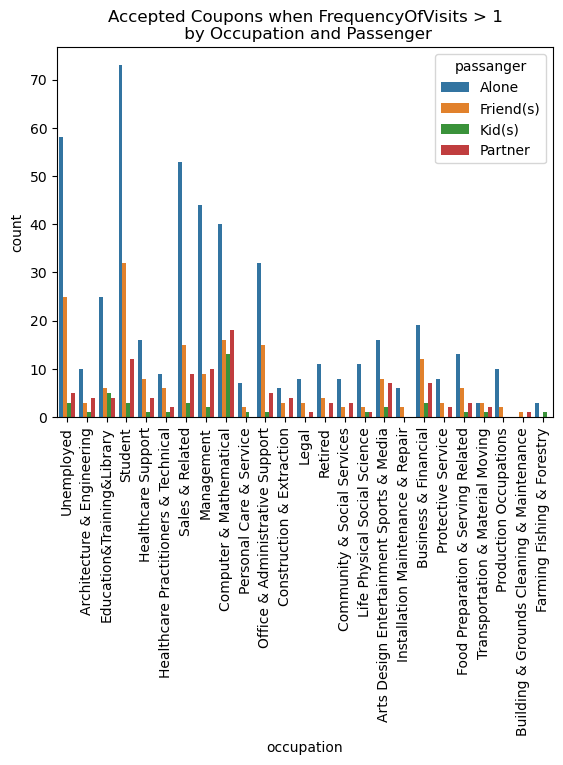

In [391]:
sns.countplot(data = bar_accepted_data, x= "occupation", hue = "passanger", legend="brief")
plt.title("Accepted Coupons when FrequencyOfVisits > 1\n by Occupation and Passenger")
plt.xticks(rotation = 90)

#### Above plot is based on accepted bar coupons data, not accounting the frequency of visits. The occupation vs passenger data confirms coupons should be targeted to student drivers who travel alone.  

Text(0.5, 1.0, 'Accepted Coupons when FrequencyOfVisits > 1\nPassenger not a kid\nOccupation not in Farming Fishing & Forestry\nOccupation & maritalStatus ')

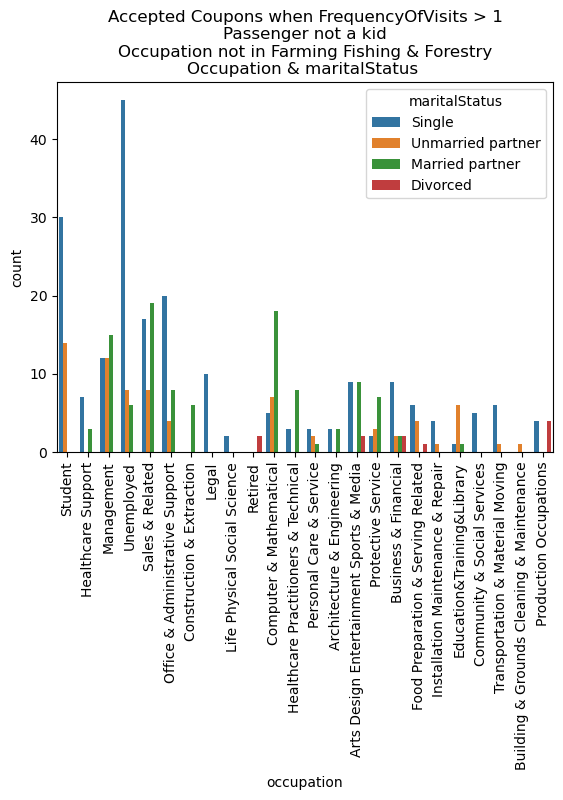

In [392]:
sns.countplot(data = bar_accepted_GT_once_NoKids_NotFarm_df , x= "occupation", hue = "maritalStatus", legend="brief")
plt.xticks(rotation = 90)
plt.title("Accepted Coupons when FrequencyOfVisits > 1\nPassenger not a kid\nOccupation not in Farming Fishing & Forestry\nOccupation & maritalStatus ")

#### Above plot is based on data from drivers who accepted coupons and meet the following conditons -who go to bar more than once a month, passenger is not a kid and not employed in Farming Fishing & Forestry. The occupation vs maritalStatus plot from this data confirms coupons should be targeted to drivers who are single and unemployed.  

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [393]:
bar_gt_once = ['1~3','4~8','gt8']
cheap_restaurant_gt_four = ['4~8', 'gt8']
income_lt_50k = ['$37500 - $49999','$12500 - $24999','$25000 - $37499','Less than $12500']
age_under_30 = ['21', '26','below21']

bar_GT_once_NoKids_NotWidowed_df = bar_data.loc[(bar_data['Bar'].isin(bar_gt_once)) & (~bar_data['passanger'].isin(["Kid(s)"])) & (~bar_data['maritalStatus'].isin(["Widowed"])) ]
bar_GT_once_NoKids_NotWidowed_accepted_rate = bar_GT_once_NoKids_NotWidowed_df["Y"].mean()

bar_GT_once_under_30_df = bar_data.loc[(bar_data['Bar'].isin(bar_gt_once)) & (bar_data['age'].isin(age_under_30))]
bar_GT_once_under_30_accepted_rate = bar_GT_once_under_30_df["Y"].mean()

bar_restaurant_GT_four_income_LT_50K_df = bar_data.loc[(bar_data['RestaurantLessThan20'].isin(cheap_restaurant_gt_four)) & (bar_data['income'].isin(income_lt_50k))]
bar_restaurant_GT_four_income_LT_50K_accepted_rate = bar_restaurant_GT_four_income_LT_50K_df["Y"].mean()

print(f"Acceptance rate for drivers who go to bars more than once a month and no kids as passengers and not widowed: {bar_GT_once_NoKids_NotWidowed_accepted_rate: .0%}")
print(f"Acceptance rate for drivers who go to bars more than once a month and age under 30: {bar_GT_once_under_30_accepted_rate: .0%}")
print(f"Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: {bar_restaurant_GT_four_income_LT_50K_accepted_rate: .0%}")

if (bar_GT_once_NoKids_NotWidowed_accepted_rate == bar_GT_once_under_30_accepted_rate == bar_restaurant_GT_four_income_LT_50K_accepted_rate):
    print (f"\nAcceptance rate is same for all groups")
else:
    max_value = max([bar_GT_once_NoKids_NotWidowed_accepted_rate, bar_GT_once_under_30_accepted_rate, bar_restaurant_GT_four_income_LT_50K_accepted_rate])
    if max_value == bar_GT_once_NoKids_NotWidowed_accepted_rate:
        print(f"\nHigher acceptance rate for drivers who go to bars more than once a month and no kids as passengers and not widowed\n")
    elif max_value == bar_GT_once_under_30_accepted_rate:
        print(f"\nHigher acceptance rate for drivers who go to bars more than once a month and age under 30\n")
    else:
        print(f"\nHigher acceptance rate for drivers who go to cheap restaurants more than 4 times and income < 50K\n")
        

Acceptance rate for drivers who go to bars more than once a month and no kids as passengers and not widowed:  71%
Acceptance rate for drivers who go to bars more than once a month and age under 30:  72%
Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K:  45%

Higher acceptance rate for drivers who go to bars more than once a month and age under 30



([0, 1, 2, 3],
 [Text(0, 0, 'Single'),
  Text(1, 0, 'Unmarried partner'),
  Text(2, 0, 'Married partner'),
  Text(3, 0, 'Divorced')])

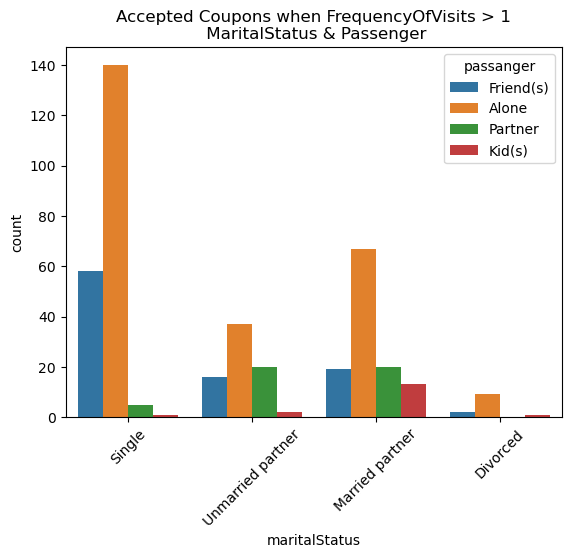

In [394]:
sns.countplot(data = bar_accepted_gt_once_data, hue= "passanger", x = "maritalStatus")
plt.title("Accepted Coupons when FrequencyOfVisits > 1\n MaritalStatus & Passenger")
plt.xticks(rotation = 45)

#### Above plot is based on data from drivers go to bar more than once a month and accepted bar coupons. The maritalStatus vs passenger data confirms coupons should be targeted to drivers who are single and travel alone.  

Text(0.5, 1.0, 'Acceptance rate\nBarVisit > 1/month & Passenger not a kid & Not widowed')

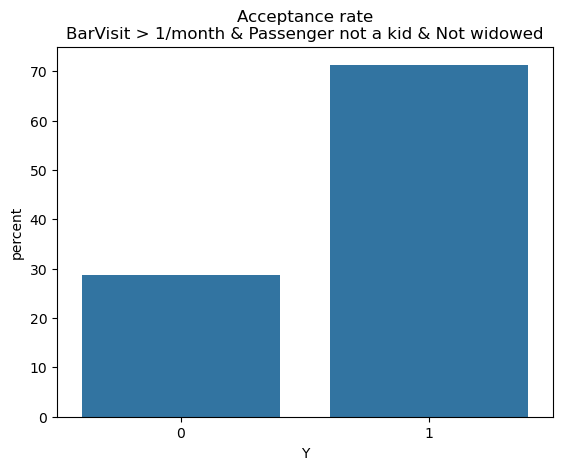

In [395]:
sns.countplot(data = bar_GT_once_NoKids_NotWidowed_df, x="Y", stat="percent")
plt.title("Acceptance rate\nBarVisit > 1/month & Passenger not a kid & Not widowed")

#### Above plot shows high acceptance rate of drivers when frequency of BarVisits is more than once per month, passenger is not a kid and person is not widowed.

Text(0.5, 1.0, 'Acceptance rate\nCheapRestaurantVisit > 4 & Income < 50K')

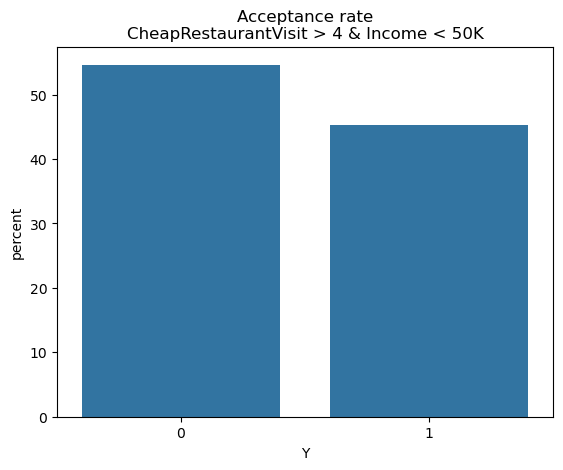

In [396]:
sns.countplot(data = bar_restaurant_GT_four_income_LT_50K_df, x="Y", stat="percent")
plt.title("Acceptance rate\nCheapRestaurantVisit > 4 & Income < 50K")

#### Above plot shows the low acceptance rate of drivers when frequency Of CheapRestaurantVisits is more than four and income is less than 50K.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the above analysis, drivers who accepted bar coupons are the ones: 
- go to bars more than once a month
- age between 20-30
- single and travel alone
- unemployed and travel alone
- students and travel alone ignoring the frequency of bar visits data

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

# Investigating Carry out & Take away coupon

Text(0.5, 1.0, 'Visualize CarryAway Values')

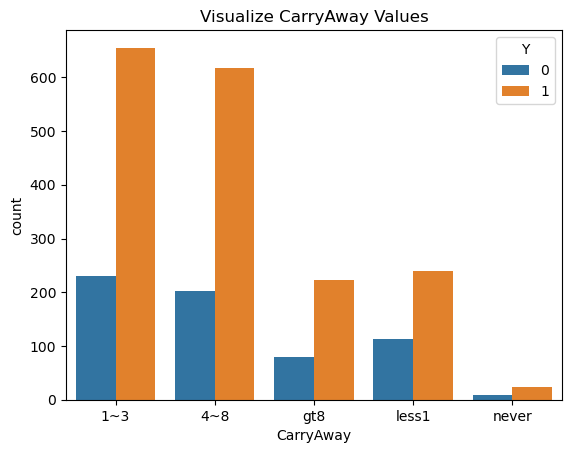

In [397]:
carryaway_data = data1[data1["coupon"] == "Carry out & Take away"]
carryaway_accepted_data = carryaway_data[carryaway_data["Y"] == 1]

# Visualize "Bar values"
sns.countplot(data = carryaway_data, x="CarryAway", hue="Y")
plt.title("Visualize CarryAway Values")

1. What is the proportion of carryaway coupons accepted?

Proportion of CarryAway coupons accepted : 0.74


Text(0.5, 1.0, 'Proportion of CarryAway Coupons Accepted')

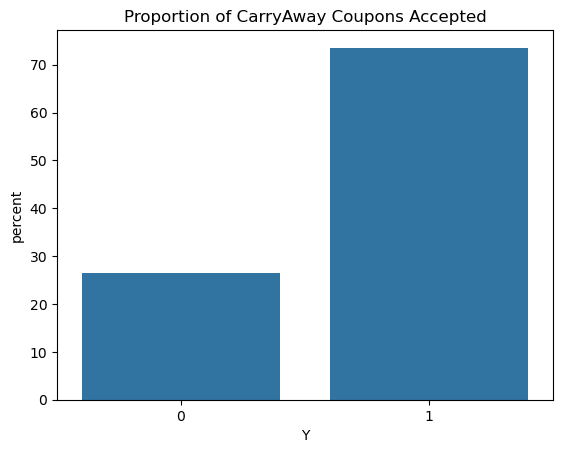

In [398]:
carryaway_accepted = carryaway_data["Y"].mean()
print(f"Proportion of CarryAway coupons accepted : {carryaway_accepted:.2f}")
sns.countplot(data = carryaway_data, x = "Y", stat = "percent", legend="brief")
plt.title("Proportion of CarryAway Coupons Accepted")

2. Does the weather condition help the acceptance rate of carryaway coupons? 
Compare the acceptance rate of sunny day with other weather conditions


Acceptance rate on a sunny day:  76.29%
Acceptance rate on a rainy or snowy day:  65.81%

Higher acceptance rate on Sunny day



Text(0.5, 1.0, 'Distribution of CarryAway Coupons by Weather')

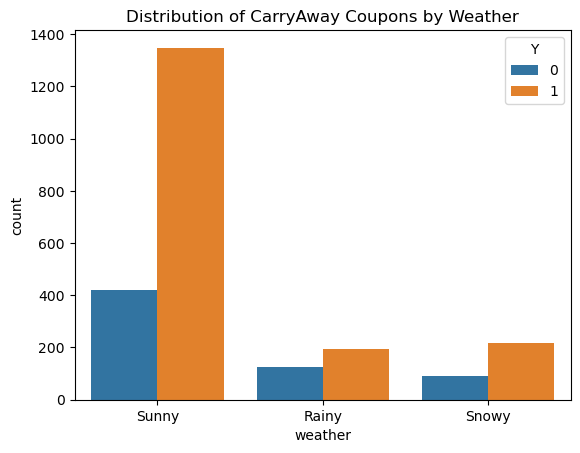

In [399]:
sunny_accepted_rate = carryaway_data.loc[carryaway_data["weather"].isin(["Sunny"])]["Y"].mean()
non_sunny_accepted_rate = carryaway_data.loc[carryaway_data["weather"].isin(["Rainy", "Snowy"])]["Y"].mean()

print (f"Acceptance rate on a sunny day: {sunny_accepted_rate: .2%}")
print (f"Acceptance rate on a rainy or snowy day: {non_sunny_accepted_rate: .2%}")

if (sunny_accepted_rate > non_sunny_accepted_rate):
    print (f"\nHigher acceptance rate on Sunny day\n")
elif (sunny_accepted_rate < non_sunny_accepted_rate):
    print (f"\nHigher acceptance rate on Rainy/Snowy day\n")
else:
    print (f"\nAcceptance rate same for both groups\n")

sns.countplot(data = carryaway_data, x = "weather", hue="Y", legend="brief")
plt.title("Distribution of CarryAway Coupons by Weather")

3. Compare the acceptance rate between those who take out 3 or fewer times a month to those who takeout more.

Acceptance rate for drivers who takeout 3 or fewer times a month:  72.31%
Acceptance rate for drivers who takeout more than 3 times a month:  74.96%

Higher acceptance rate for drivers who takeout more than 3 times a month



Text(0.5, 1.0, 'Distribution of CarryAway Coupons')

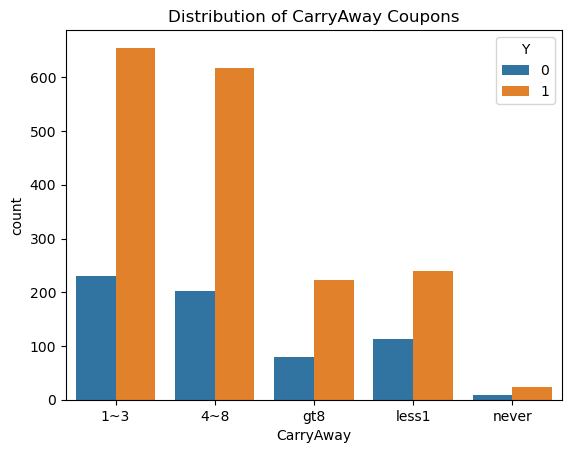

In [400]:

carryaway_lte_3 = ["never", "less1", "1~3"]
carryaway_gt_3 = ["4~8", "gt8"]

carryaway_lte_3_accepted_rate = carryaway_data.loc[carryaway_data["CarryAway"].isin(carryaway_lte_3)]["Y"].mean()
carryaway_gt_3_accepted_rate = carryaway_data.loc[carryaway_data["CarryAway"].isin(carryaway_gt_3)]["Y"].mean()

print (f"Acceptance rate for drivers who takeout 3 or fewer times a month: {carryaway_lte_3_accepted_rate: .2%}")
print (f"Acceptance rate for drivers who takeout more than 3 times a month: {carryaway_gt_3_accepted_rate: .2%}")

if (carryaway_lte_3_accepted_rate > carryaway_gt_3_accepted_rate):
    print (f"\nHigher acceptance rate for drivers who takeout 3 or fewer times a month\n")
elif (carryaway_lte_3_accepted_rate < carryaway_gt_3_accepted_rate):
    print (f"\nHigher acceptance rate for drivers who takeout more than 3 times a month\n")
else:
    print (f"\nAcceptance rate is same for both groups\n")

sns.countplot(data = carryaway_data, x = "CarryAway", hue="Y", legend="brief")
plt.title("Distribution of CarryAway Coupons")


4. Will a breakfast or dinner coupon boost the carryaway coupon acceptance rate?
Compare the acceptance rates between those drivers who takeout in the evening before heading to home and who takeout in the morning before heading to work

Acceptance rate in the morning:  65.49%
Acceptance rate in the evening:  78.87%

Higher acceptance rate for dinner coupon



Text(0.5, 1.0, 'Distribution of CarryAway Accepted Coupons by Time and Destination')

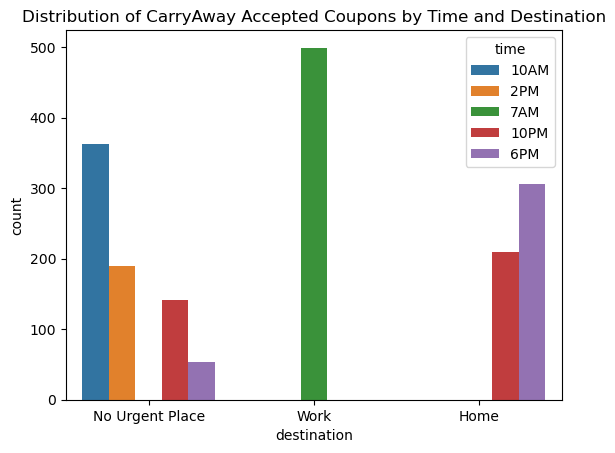

In [401]:
breakfast_accepted_rate = carryaway_data.loc[(carryaway_data["destination"].isin(["Work"])) & (carryaway_data["time"].isin(["7AM", "10AM"]))]["Y"].mean()
dinner_accepted_rate = carryaway_data.loc[(carryaway_data["destination"].isin(["Home"])) & (carryaway_data["time"].isin(["6PM", "10PM"]))]["Y"].mean()

print (f"Acceptance rate in the morning: {breakfast_accepted_rate: .2%}")
print (f"Acceptance rate in the evening: {dinner_accepted_rate: .2%}")

if (breakfast_accepted_rate > dinner_accepted_rate):
    print (f"\nHigher acceptance rate for breakfast coupon\n")
elif (breakfast_accepted_rate < dinner_accepted_rate):
    print (f"\nHigher acceptance rate for dinner coupon\n")
else:
    print (f"\nAcceptance rate same for both coupons\n")

sns.countplot(data = carryaway_accepted_data, x = "destination", hue="time", legend="brief")
plt.title("Distribution of CarryAway Accepted Coupons by Time and Destination")